## Data preprocessing

### Feature scaling

Which ML algorithms need feature scaling?
 - those that calculate distance (euclidean), e.g. KNN, K-means, SVM, PCA, Linear discriminant analysis, etc.
 - Gradient Descent based algorithms, e.g. Linear reg, logreg, NN, etc.
 
 Tree based Algorithms do not need feature scaling, e.g. decision tree, random forest, XGboost, gradient boost, etc.

use standardization generaly (z-score scaling) for algorithms that are based on clustering, e.g. PCA
for image processing, NN, and K nearest neighbours, normalization (min-max scaling) is prefered

In [14]:
# importing resources
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# importing dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# extracting
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [10]:
# checking
df2.isnull().sum()

survived      0
pclass        0
age         177
parch         0
dtype: int64

In [11]:
# some columns have missing values - imputing mean
df3 = df2.fillna(df2.mean())

In [12]:
# checking
df3.isnull().sum()

survived    0
pclass      0
age         0
parch       0
dtype: int64

In [13]:
# dividing into x and y
x = df3.drop('survived', axis=1)
y = df3['survived']
print('X shape is ', x.shape)
print('Y shape is ', y.shape)

X shape is  (891, 3)
Y shape is  (891,)


In [15]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=99)

In [16]:
# checking sizes
print('X train shape is ', xtrain.shape)
print('Y train shape is ', ytrain.shape)
print('X test shape is ', xtest.shape)
print('Y test shape is ', ytest.shape)

X train shape is  (712, 3)
Y train shape is  (712,)
X test shape is  (179, 3)
Y test shape is  (179,)


In [17]:
sc = StandardScaler()
sc.fit(xtrain)

StandardScaler()

In [18]:
sc.mean_ # looking at mean values of 3 features

array([ 2.3005618 , 29.46115582,  0.37219101])

In [19]:
sc.scale_ # looking at stdev values of 3 features

array([ 0.83437369, 12.74955615,  0.79532463])

In [20]:
xtrain.describe() # we can see mean and stdev are same

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.300562,29.461156,0.372191
std,0.834960,12.758519,0.795884
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [21]:
# scaling features (no need to scale dependent variable)
xtrain_sc = sc.transform(xtrain)
xtest_sc = sc.transform(xtest)

In [22]:
# checking
xtrain_sc

array([[ 0.83827931, -1.05581368,  0.78937451],
       [-0.36022444,  1.92468223, -0.4679737 ],
       [-0.36022444,  1.2187753 , -0.4679737 ],
       ...,
       [-1.55872819,  0.01866432, -0.4679737 ],
       [-1.55872819,  0.983473  , -0.4679737 ],
       [-1.55872819, -0.42834086, -0.4679737 ]])

In [24]:
# converting to dataframe
xtrain_sc = pd.DataFrame(xtrain_sc, columns = ['pclass', 'age', 'parch'])
xtest_sc = pd.DataFrame(xtest_sc, columns = ['pclass', 'age', 'parch'])

In [25]:
xtrain_sc.head()

,pclass,age,parch
0,0.838279,-1.055814,0.789375
1,-0.360224,1.924682,-0.467974
2,-0.360224,1.218775,-0.467974
3,0.838279,1.375644,-0.467974
4,-1.558728,0.018664,-0.467974


In [26]:
xtrain_sc.describe() # mean value is almost 0

,pclass,age,parch
count,7.120000e+02,7.120000e+02,7.120000e+02
mean,2.139362e-16,-2.167430e-17,-1.627911e-16
std,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.558728e+00,-2.277817e+00,-4.679737e-01
25%,-3.602244e-01,-5.852091e-01,-4.679737e-01
50%,8.382793e-01,1.866432e-02,-4.679737e-01
75%,8.382793e-01,4.344343e-01,-4.679737e-01
max,8.382793e-01,3.963969e+00,7.076116e+00


In [27]:
xtrain_sc.describe().round(2) # mean value is 0 now
# mean is 0 and stdev is 1

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.56,-2.28,-0.47
25%,-0.36,-0.59,-0.47
50%,0.84,0.02,-0.47
75%,0.84,0.43,-0.47
max,0.84,3.96,7.08


In [28]:
mmc = MinMaxScaler()
mmc.fit(xtrain)

MinMaxScaler()

In [30]:
mmc.min_

array([-0.5       , -0.00527771,  0.        ])

In [32]:
mmc.scale_ # looking at stdev values of 3 features

array([0.5       , 0.01256597, 0.16666667])

In [34]:
xtrain.describe().round(2) # distribution

,pclass,age,parch
count,712.00,712.00,712.00
mean,2.30,29.46,0.37
std,0.83,12.76,0.80
min,1.00,0.42,0.00
25%,2.00,22.00,0.00
50%,3.00,29.70,0.00
75%,3.00,35.00,0.00
max,3.00,80.00,6.00


In [35]:
xtrain_mmc = mmc.transform(xtrain)
xtest_mmc = mmc.transform(xtest)

In [37]:
xtrain_mmc

array([[1.        , 0.19577783, 0.16666667],
       [0.5       , 0.67328474, 0.        ],
       [0.5       , 0.560191  , 0.        ],
       ...,
       [0.        , 0.36792055, 0.        ],
       [0.        , 0.52249309, 0.        ],
       [0.        , 0.2963056 , 0.        ]])

In [39]:
# dataframe
xtrain_mmc = pd.DataFrame(xtrain_mmc, columns = ['pclass', 'age', 'parch'])
xtest_mmc = pd.DataFrame(xtest_mmc, columns = ['pclass', 'age', 'parch'])

In [40]:
xtrain_mmc

,pclass,age,parch
0,1.0,0.195778,0.166667
1,0.5,0.673285,0.000000
2,0.5,0.560191,0.000000
3,1.0,0.585323,0.000000
4,0.0,0.367921,0.000000
...,...,...,...
707,1.0,0.359135,0.000000
708,0.0,0.367921,0.000000
709,0.0,0.367921,0.000000
710,0.0,0.522493,0.000000


In [41]:
xtrain_mmc.describe().round(2) # min and max values are 0 and 1 respectively

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.36,0.06
std,0.42,0.16,0.13
min,0.00,0.00,0.00
25%,0.50,0.27,0.00
50%,1.00,0.37,0.00
75%,1.00,0.43,0.00
max,1.00,1.00,1.00


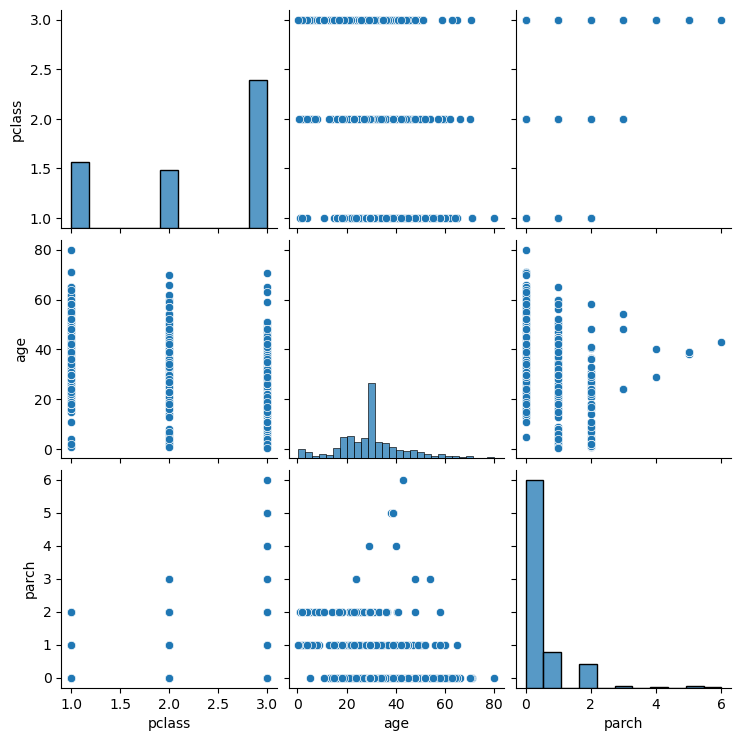

In [42]:
# does scaling change distribution?
sns.pairplot(xtrain)

In [46]:
sns.pairplot(xtrain_sc)

In [47]:
sns.pairplot(xtrain_mmc)

In [ ]:
# distributionis the same